<h1>Part 1</h1>

In [1]:
# import modules
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf
import pandas as pd
import numpy as np
# from iexfinance.stocks import Stock
import yfinance as yf
import os

In [3]:
style.use('ggplot')

In [68]:
# time period
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

In [69]:
# download TSLA stock data
tesla = yf.download("TSLA", start, end)

[*********************100%***********************]  1 of 1 completed


In [70]:
# check that the data is downloaded as a dataframe
type(tesla)

pandas.core.frame.DataFrame

In [71]:
# print 'head' of the dataframe
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [72]:
# print 'tail' of the dataframe but final 10 values
tesla.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800
2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100
2020-12-18,668.900024,695.000000,628.539978,695.000000,695.000000,222126200
2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300
2020-12-22,648.000000,649.880005,614.229980,640.340027,640.340027,51716000
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800


<h1>Part 2 - importing data and visualisation</h1>

In [73]:
# turn dataframe into csv
tesla.to_csv('tsla.csv')

In [74]:
# read csv in
df = pd.read_csv('tsla.csv')

In [75]:
# print 'head' of the new dataframe note: notice that there is no index column
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [76]:
# read csv in again, this time parsing dates and setting the index
df2 = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

In [77]:
# print 'head' of the dataframe df2
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


<AxesSubplot:xlabel='Date'>

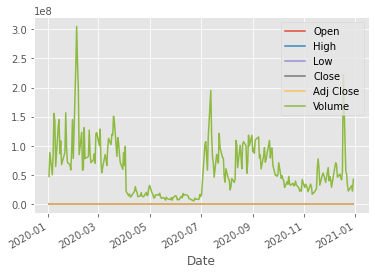

In [78]:
# plot df2
df2.plot()

In [79]:
# show only the Adj Close of df2
df2['Adj Close']

Date
2020-01-02     86.052002
2020-01-03     88.601997
2020-01-06     90.307999
2020-01-07     93.811996
2020-01-08     98.428001
                 ...    
2020-12-23    645.979980
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
Name: Adj Close, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

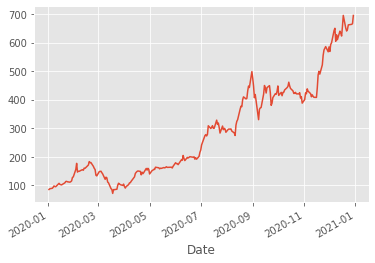

In [80]:
# plot df2 but only the adj close
df2['Adj Close'].plot()

In [81]:
# show only the Adj Close of df2 as a dataframe
df2[['Adj Close']]

,Adj Close
Date,
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
2020-01-08,98.428001
...,...
2020-12-23,645.979980
2020-12-24,661.770020
2020-12-28,663.690002


<AxesSubplot:xlabel='Date'>

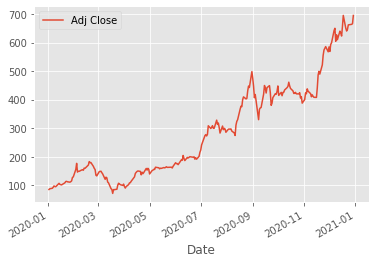

In [82]:
# plot df2 but only the adj close
df2[['Adj Close']].plot()

In [83]:
# show only the Open and High of df2
df2[['Open', 'High']].head()

,Open,High
Date,,
2020-01-02,84.900002,86.139999
2020-01-03,88.099998,90.800003
2020-01-06,88.094002,90.311996
2020-01-07,92.279999,94.325996
2020-01-08,94.739998,99.697998


<AxesSubplot:xlabel='Date'>

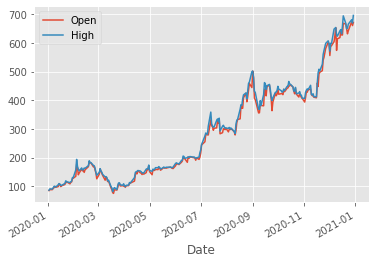

In [84]:
# plot the open and high of df2
df2[['Open', 'High']].plot()

<h1>Part 3 - Manipulating and Visualising Data</h1>

In [85]:
# create a new dataframe from df2. 
df3 = df2.copy()
df3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [86]:
# this new dataframe will take calculate 100 day moving average
# 100 day moving avg = average price of stock over the previous 100 days
df3['100ma'] = df3['Adj Close'].rolling(window=100).mean()

In [87]:
# print dataframe note: notice first 100 days are NaN due to insufficient data to calculate 100 day moving avg
df3.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,NaN
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,NaN
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,NaN
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,NaN


In [88]:
# drop the NaN rows from the dataframe
df3.dropna(inplace=True)

In [89]:
# notice that data now starts from 26/05/2020 (after the first 100 days)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2020-05-26,166.899994,166.919998,163.141998,163.774002,163.774002,8089700,132.03320
2020-05-27,164.171997,165.542007,157.000000,164.046005,164.046005,11549500,132.81314
2020-05-28,162.701996,164.949997,160.337997,161.162003,161.162003,7255600,133.53874
2020-05-29,161.750000,167.000000,160.841995,167.000000,167.000000,11812500,134.30566
2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,14939500,135.16374


In [90]:
# we can use the min_periods parameter to create a rolling average for the first 100 rows
df4 = df2.copy()
df4['100ma'] = df4['Adj Close'].rolling(window=100, min_periods=0).mean()
df4.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,86.052002
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,87.327000
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,88.320666
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,89.693499
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,91.440399


<BarContainer object of 252 artists>

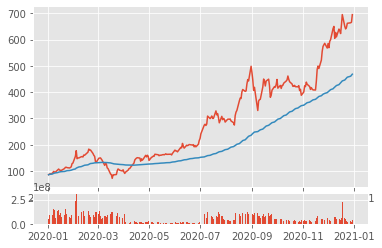

In [115]:
# generate subplots
# 1st parameter = grid size row x col, 2nd = starting point, 3rd = rowspan, 4th = colspan, 5th = share x-axis with other subplots
ax1 = plt.subplot2grid( (6,1), (0,0), rowspan=5, colspan=1 )
ax2 = plt.subplot2grid( (6,1), (5,0), rowspan=1, colspan=1, sharex=ax1 )

# plot subplots
ax1.plot(df4.index, df4['Adj Close'])
ax1.plot(df4.index, df4['100ma'])
ax2.bar(df4.index, df4['Volume'])

<h1>Part 4 - Resampling Data and Candlestick Graphs</h1>

In [158]:
# create a new dataframe from df2. 
df5 = df2.copy()
df5.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [159]:
# create a new resampled dataframe consisting of the open, high, low, close of the Adj Close every 10 days 
df_ohlc = df5['Adj Close'].resample('10D').ohlc()
df_ohlc.head()

,open,high,low,close
Date,,,,
2020-01-02,86.052002,98.428001,86.052002,95.629997
2020-01-12,104.972000,109.440002,102.099998,109.440002
2020-01-22,113.912003,130.113998,111.603996,130.113998
2020-02-01,156.000000,177.412003,146.940002,154.255997
2020-02-11,154.876007,183.483994,153.457993,179.882004


In [160]:
# create a new resampled dataframe consisting of the sum of the Volume every 10 days 
df_volume = df5['Volume'].resample('10D').sum()
df_volume.head()

Date
2020-01-02     639349500
2020-01-12     630259500
2020-01-22     766483500
2020-02-01    1191148000
2020-02-11     625713000
Freq: 10D, Name: Volume, dtype: int64

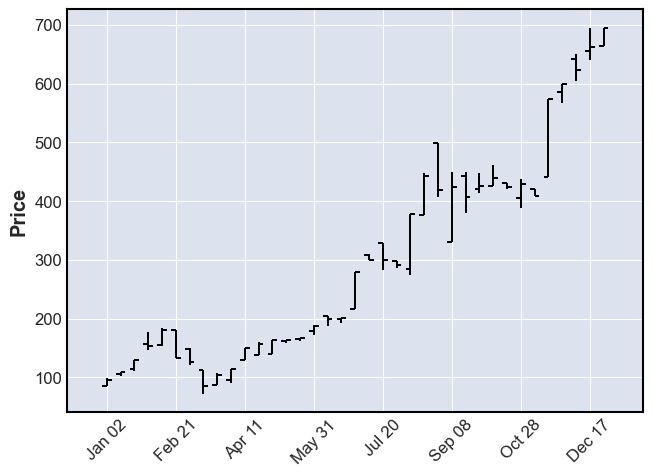

In [161]:
# plot df_ohlc in a candlestick graph
mpf.plot(test_ohlc)

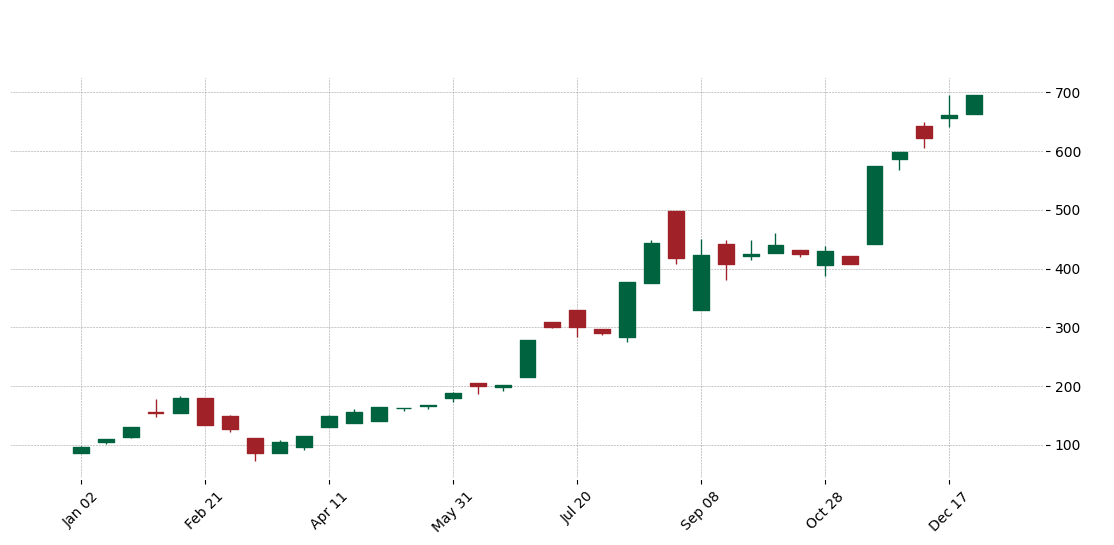

In [166]:
# plot df_ohlc in a candlestick graph v2
mpf.plot(df_ohlc, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=False
            )

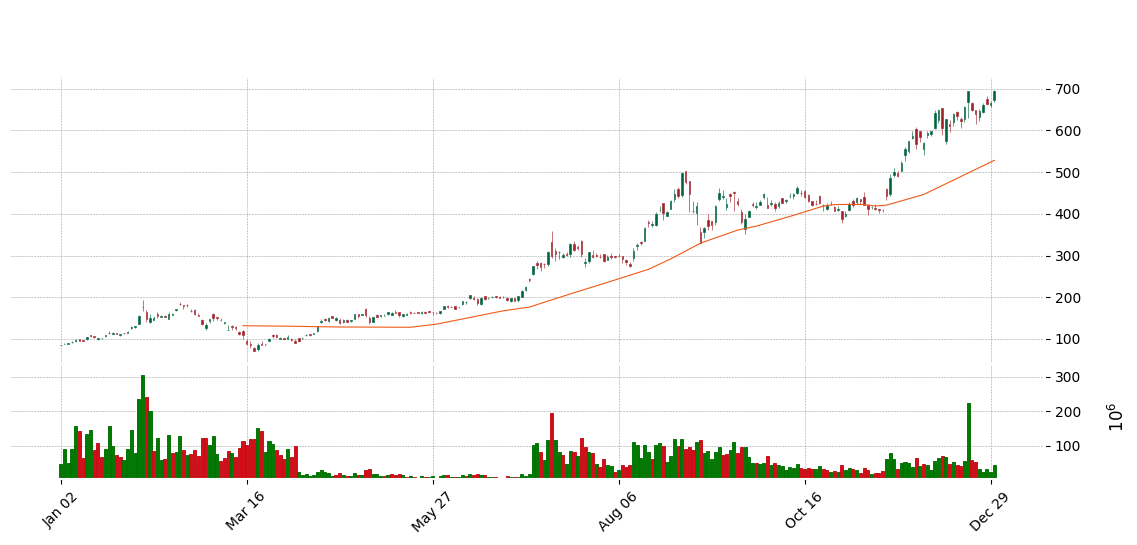

In [167]:
# testing mpf plot from youtube comment
test3 = pd.read_csv('tsla.csv',parse_dates=True, index_col=0)
mpf.plot(test3, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True
            )

In [169]:
# testing what test3 is
test3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


<h1>Part 5 - Web Scraping</h1>

In [2]:
import bs4 as bs
import pickle
import requests

In [15]:
# create a function to save S&P500 tickers
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.replace('\n','')
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
            
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP

<h1>Part 6 - Combining Web Scraping</h1>

In [24]:
# get ticker data for S&P500 companies
def get_data_from_yahoo(reload_sp500=False):
    # if reload data is true, then re-run the function to grab S&P500 tickers, else open the existing pickle file
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    # make directory if it does not exist     
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    # time period
    start_2 = dt.datetime(2019,1,1)
    end_2 = dt.datetime(2020,12,31)
    
    # get ticker data    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df6_1 = yf.download(ticker, start_2, end_2)
            df6_1.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
    
get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 complete

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [25]:
# check else statement is working
get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have ADP
Already have AZO
Already have AV

<h1>Part 7 - Combining Dataframe</h1>

In [27]:
# take the Adj Close for all stocks and combine them into one single dataframe and save as csv
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    
    df7_main = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df7_1 = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df7_1.set_index('Date', inplace=True) # set index
        df7_1.rename(columns = {'Adj Close':ticker}, inplace=True) # rename Adj Close column to the name of the ticker
        df7_1.drop(['Open','High','Low','Close','Volume'], 1, inplace=True) # drop unwanted columns
        
        # start joining these dataframes together         
        if df7_1.empty:
            df7_main = df7_1
        else:
            df7_main = df7_main.join(df7_1, how='outer')
        
        # print progress         
        if count % 10 == 0:
            print(count)


    print(df7_main.head())
    df7_main.to_csv('sp500_joined_closes.csv')

compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2018-12-31         NaN        NaN        NaN         NaN         NaN   
2019-01-02  178.094437  67.305016  78.864014  309.959991  136.644974   
2019-01-03  171.388519  64.128601  76.265549  302.290009  131.979675   
2019-01-04  178.439545  65.958916  78.722588  313.440002  137.111526   
2019-01-07  178.029175  66.946693  79.871574  314.799988  137.587784   

                 ATVI        ADBE        AMD         AAP        AES  ...  \
Date                                                                 ...   
2018-12-31        NaN         NaN        NaN         NaN        NaN  ...   
2019-01-02  46.350380  224.570007  18.830000  156.195236  13.271391  ...  

<h1>Part 8 - Analysing Dataframes</h1>

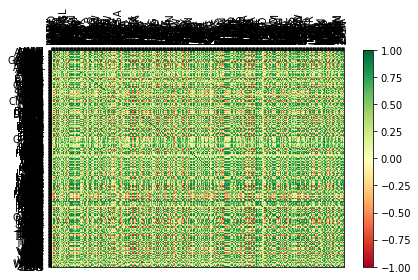

In [35]:
def visualize_data():
    df8 = pd.read_csv('sp500_joined_closes.csv')

    df_corr = df8.corr() # dataframe calculating the correlation between companies stock price
    
    # print(df_corr.head())

    data = df_corr.values
    fig = plt.figure()
    ax8 = fig.add_subplot(1,1,1)
    
    heatmap = ax8.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax8.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax8.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax8.invert_yaxis()
    ax8.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax8.set_xticklabels(column_labels)
    ax8.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
visualize_data()

In [6]:
import seaborn as sns

         Date         MMM        ABT       ABBV        ABMD         ACN  \
1  2019-01-02  178.094437  67.305016  78.864014  309.959991  136.644974   

       ATVI        ADBE    AMD         AAP  ...        WYNN        XEL  \
1  46.35038  224.570007  18.83  156.195236  ...  100.250526  45.739101   

         XRX       XLNX        XYL        YUM        ZBRA         ZBH  \
1  18.507345  84.360565  64.819427  88.240112  156.240005  100.729301   

        ZION        ZTS  
1  38.978245  83.466866  

[1 rows x 506 columns]
                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2019-01-02  178.094437  67.305016  78.864014  309.959991  136.644974   

                ATVI        ADBE    AMD         AAP        AES  ...  \
Date                                                            ...   
2019-01-02  46.35038  224.570007  18.83  156.195236  13.271391  ...   

                  WYNN        XEL        XRX  

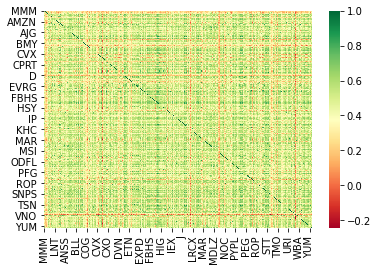

In [8]:
# analyse the dataframe by creating a df that calculates the correlation and plot this on a heatgraph
def visualize_data_returns():
    
    df8_2 = pd.read_csv('sp500_joined_closes.csv') # read file that contains S&P500 ticker data: Adj Close for 2019-2020
    df8_2 = df8_2.iloc[1:] # drop the first row due to blanks
    print(df8_2.head(1))
    
    df8_2.set_index('Date', inplace=True) # set date as the index of the dataframe
    print(df8_2.head(1))
    
    df8_2_corr = df8_2.pct_change().corr()  # dataframe calculating the correlation between companies stock price pct change
    print(df8_2_corr.head(1))
    sns.heatmap(df8_2_corr,annot=False,cmap=plt.cm.RdYlGn) # create heatmap using seaborn
    
visualize_data_returns()

<h1>Part 9 - Creating Features & Labels for ML pt. 1</h1>

In [10]:
# import packages
import numpy as np
import pandas as pd
import pickle

In [11]:
# convert pricing data to % change so everything is normalised
# features define something, labels are the target
# labels = buy, sell, hold
# generate labels 
# theory: did the price, based on these X features, within the next 7 days go up more than 2%. If yes then label = buy
# did price, within the next 7 days, go down more than 2%. If yes then label = sell
# did price stay within +- 2%, if yes then hold

In [67]:
def process_data_for_labels(ticker):
    # number of days to check price fluctuation
    hm_days = 7
    
    # read csv of S&P500 tickers and Adj Close price and store in dataframe df9
    df9 = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    
    # drop first row of df9 due to blanks
    df9 = df9.iloc[1:] # drop the first row due to blanks
    
    # store ticker names from df9 in a list called tickers
    tickers = df9.columns.values.tolist()
    
    # fill NaN with 0
    df9.fillna(0, inplace=True)
    
    # workout pct change in price for ticker variable (e.g. 'AAPL') over hm_days 
    for i in range(1, hm_days+1):
        df9['{}_{}d'.format(ticker, i)] = ( df9[ticker].shift(-i) - df9[ticker] ) / df9[ticker]
        
    df9.fillna(0, inplace=True)
    
#     print(df9['AAPL'].head(5))
    
    return tickers, df9

process_data_for_labels('MS')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BRK-B',
  'BBY',
  'BIO',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BF-B',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CTLT',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  'CSCO',
 

In [55]:
# understanding the for loop and shift

# read csv of S&P500 tickers and Adj Close price and store in dataframe df9_2
df9_2 = pd.read_csv('sp500_joined_closes.csv', index_col=0)

# drop first row of df9 due to blanks
df9_2 = df9_2.iloc[1:] # drop the first row due to blanks

# fill NaN with 0
df9_2.fillna(0, inplace=True)

print(df9_2['XOM'].head(10))
print("--------------------")
print(df9_2['XOM'].shift(-1).head(10)) 
print("--------------------")
print(df9_2['XOM'].shift(-2).head(10))

for i in range(1, 8):
    df9_2['XOM_{}d'.format(i)] = ( df9_2['XOM'].shift(-i) - df9_2['XOM'] ) / df9_2['XOM']
    

print("--------------------")
print(df9_2[['XOM_1d', 'XOM_2d','XOM_3d', 'XOM_4d', 'XOM_5d', 'XOM_6d', 'XOM_7d']].head(10))

Date
2019-01-02    61.586319
2019-01-03    60.640751
2019-01-04    62.876545
2019-01-07    63.203518
2019-01-08    63.663055
2019-01-09    63.998871
2019-01-10    63.671890
2019-01-11    63.380276
2019-01-14    63.300735
2019-01-15    63.336075
Name: XOM, dtype: float64
--------------------
Date
2019-01-02    60.640751
2019-01-03    62.876545
2019-01-04    63.203518
2019-01-07    63.663055
2019-01-08    63.998871
2019-01-09    63.671890
2019-01-10    63.380276
2019-01-11    63.300735
2019-01-14    63.336075
2019-01-15    63.309570
Name: XOM, dtype: float64
--------------------
Date
2019-01-02    62.876545
2019-01-03    63.203518
2019-01-04    63.663055
2019-01-07    63.998871
2019-01-08    63.671890
2019-01-09    63.380276
2019-01-10    63.300735
2019-01-11    63.336075
2019-01-14    63.309570
2019-01-15    63.742588
Name: XOM, dtype: float64
--------------------
              XOM_1d    XOM_2d    XOM_3d    XOM_4d    XOM_5d    XOM_6d  \
Date                                              

<h1>Part 10 - Creating Features & Labels for ML pt. 2</h1>

In [120]:
# initial function logic to map to the '{ticker}_{id}' columns
# this will insert the features in df9 for buy sell hold

def buy_sell_hold(*args): # *args = pass any number of parameters
    cols = [c for c in args] # or cols=list(args)
    
    
    requirement = 0.03
   
    for col in cols:
        if col > requirement: # buy
            return 1
        if col < -requirement: # sell
            return -1
    return 0 # hold

<h1>Part 11 - Creating Features & Labels for ML pt. 3</h1>

In [59]:
from collections import Counter

In [103]:
# map helper function (buy_sell_hold()) to the dataframe (df9)
def extract_featuresets_with_print(ticker):
    
    tickers, df10 = process_data_for_labels(ticker)
    
    df10['{}_target'.format(ticker)] = list(map( buy_sell_hold, 
                                                df10['{}_1d'.format(ticker)], 
                                                df10['{}_2d'.format(ticker)], 
                                                df10['{}_3d'.format(ticker)], 
                                                df10['{}_4d'.format(ticker)], 
                                                df10['{}_5d'.format(ticker)], 
                                                df10['{}_6d'.format(ticker)], 
                                                df10['{}_7d'.format(ticker)]
                                               )
                                           )
    print('df10 = ')
    print(df10[['{}'.format(ticker),'{}_target'.format(ticker)]].head(10))
    print('----------------------------------------------------------------')
    
    vals = df10['{}_target'.format(ticker)].values.tolist()
    print('vals = ')
    print(vals[:10])
    print('----------------------------------------------------------------')

    
    str_vals = [str(i) for i in vals]
    
    print('str_vals = ')
    print(str_vals[:10])
    print('----------------------------------------------------------------')
    
    print('Data Spread:', Counter(str_vals)) # gives spread. want 1, 0, -1 to be spread equally so adjust requirement e.g 2%->3%
    print('----------------------------------------------------------------')

    df10.fillna(0, inplace=True)
    
    df10 = df10.replace([np.inf, -np.inf], np.nan)
    
    df10.dropna(inplace=True)
    
    print('df10 = ')
    print(df10[['{}'.format(ticker),'{}_target'.format(ticker)]].head(10))
    print('----------------------------------------------------------------')

    df10_vals = df10[[ticker for ticker in tickers]].pct_change()
    df10_vals = df10_vals.replace([np.inf, -np.inf], 0)
    df10_vals.fillna(0, inplace=True)
    
    print('df10_vals = ')
    print(df10_vals[['{}'.format(ticker)]].head(10))
    print('----------------------------------------------------------------')
    
    X = df10_vals.values
    y = df10['{}_target'.format(ticker)].values
    
    print('X = ')
    print(X)
    print('----------------------------------------------------------------')

    print('y = ')
    print(y)
    print('----------------------------------------------------------------')
    
    return X, y, df10

def extract_featuresets(ticker):
    
    tickers, df10 = process_data_for_labels(ticker)
    
    df10['{}_target'.format(ticker)] = list(map(buy_sell_hold, 
                                                df10['{}_1d'.format(ticker)], 
                                                df10['{}_2d'.format(ticker)], 
                                                df10['{}_3d'.format(ticker)], 
                                                df10['{}_4d'.format(ticker)], 
                                                df10['{}_5d'.format(ticker)], 
                                                df10['{}_6d'.format(ticker)], 
                                                df10['{}_7d'.format(ticker)]))

    vals = df10['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    
    print('Data Spread:', Counter(str_vals)) # gives spread. want 1, 0, -1 to be spread equally so adjust requirement e.g 2%->3%
    print('----------------------------------------------------------------')

    df10.fillna(0, inplace=True)
    df10 = df10.replace([np.inf, -np.inf], np.nan)
    df10.dropna(inplace=True)
    
    df10_vals = df10[[ticker for ticker in tickers]].pct_change()
    df10_vals = df10_vals.replace([np.inf, -np.inf], 0)
    df10_vals.fillna(0, inplace=True)
    
    X = df10_vals.values
    y = df10['{}_target'.format(ticker)].values
    
    return X, y, df10


extract_featuresets_with_print('XOM')

df10 = 
                  XOM  XOM_target
Date                             
2019-01-02  61.586319           1
2019-01-03  60.640751           1
2019-01-04  62.876545           0
2019-01-07  63.203518           0
2019-01-08  63.663055           0
2019-01-09  63.998871           0
2019-01-10  63.671890           0
2019-01-11  63.380276           0
2019-01-14  63.300735           0
2019-01-15  63.336075           0
----------------------------------------------------------------
vals = 
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
----------------------------------------------------------------
str_vals = 
['1', '1', '0', '0', '0', '0', '0', '0', '0', '0']
----------------------------------------------------------------
Data Spread: Counter({'-1': 189, '0': 177, '1': 138})
----------------------------------------------------------------
df10 = 
                  XOM  XOM_target
Date                             
2019-01-02  61.586319           1
2019-01-03  60.640751           1
2019-01-04  62.876545   

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03765372, -0.04719432, -0.03294868, ..., -0.01808761,
         -0.00553166, -0.03456455],
        [ 0.04114059,  0.02854132,  0.03221689, ...,  0.03415308,
          0.03071351,  0.03923508],
        ...,
        [ 0.00108871, -0.00516841,  0.00183997, ..., -0.00241206,
          0.00046148,  0.01039073],
        [-0.00492245,  0.00500975,  0.01208313, ...,  0.02391025,
         -0.01360701,  0.00449532],
        [ 0.00149551,  0.00101542,  0.00544412, ..., -0.00150866,
          0.01052141,  0.00705008]]),
 array([ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  

<h1>Part 12 - ML Running X,y Through Classifier</h1>

In [100]:
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [107]:
# function to do machine learning
def do_ml(ticker):
    
    # X = feature set, y = labels
    X, y, df12 = extract_featuresets(ticker)
    
    # create training set. test against 25% of the sample data - this will give accuracey.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # define classifier     
    clf = neighbors.KNeighborsClassifier()
    
    # use a classifier to fit the input (feature) data to the target data (labels)
    clf.fit(X_train, y_train)
    
    # determine accuracy of model     
    confidence = clf.score(X_test, y_test)
    print('Accuracy: ', confidence)
    
    # prediction     
    predictions = clf.predict(X_test)
    
    print('Predicted Spread: ', Counter(predictions))
    
    return confidence

do_ml('BAC')

Data Spread: Counter({'1': 203, '0': 155, '-1': 146})
----------------------------------------------------------------
Accuracy:  0.3492063492063492
Predicted Spread:  Counter({0: 76, 1: 43, -1: 7})


0.3492063492063492

In [121]:
# try more advanced classifier
def do_more_ml(ticker):
    
    # X = feature set, y = labels
    X, y, df12 = extract_featuresets(ticker)
    
    # create training set. test against 25% of the sample data - this will give accuracey.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # define classifier: take 3 classifiers and let them vote as to which one is best  
    clf = VotingClassifier([ ('lsvc', svm.LinearSVC() ),
                           ('knn', neighbors.KNeighborsClassifier() ),
                           ('rfor', RandomForestClassifier() )])
    
    # use a classifier to fit the input (feature) data to the target data (labels)
    clf.fit(X_train, y_train)
    
    # determine accuracy of model     
    confidence = clf.score(X_test, y_test)
    print('Accuracy: ', confidence)
    
    # prediction     
    predictions = clf.predict(X_test)
    
    print('Predicted Spread: ', Counter(predictions))
    
    return confidence

do_more_ml('MS')

Data Spread: Counter({'1': 206, '-1': 154, '0': 144})
----------------------------------------------------------------
Accuracy:  0.42857142857142855
Predicted Spread:  Counter({1: 66, 0: 36, -1: 24})


0.42857142857142855

<h1>Part 13 - Backtesting</h1>

<h1>Part 14 - </h1>

<h1>Part 15 - </h1>

<h1>Part 16 - </h1>

<h1>Part 17 - </h1>

<h1>Part 18 - </h1>

<h1>Part 19 - </h1>

<h1>Part 20 - </h1>